In [1]:
import pandas as pd
import numpy as np
import pyreadstat
import missingno as msno
import matplotlib.pyplot as plt

In [2]:
df, metadata = pyreadstat.read_sav('tastdb-exp-2019.sav', apply_value_formats=True, dates_as_pandas_datetime =True)

Useful questions for EDA


1. In which countries were the most ships registered (Look at variable: National?) ---> How much for Bremen and Prussia 

2. What info can be extracted from the variable ship name? --> SHIPNAME

3. Compare SHIPNAME to NATIONAL? Were the ships using the flag of their place of manufacturing?

4. Was what the most common RIG used by slavers? Are there NATIONAL particularities?

5. Is there any correlation between RIG, TONNAGE, GUNS and FATE of the voyage? ---> GUNS, TONNAGE, YRCONS (year of vessel const), PLACCONS (place of vessel construction) : lots of NaN

6. Who owned the most ventures? Check variable OWNERA--->

7. Which voyages had the maximum numbers of OWNERS from which Countries?

8. Percentage of voyages completed as intended(FATE 1 == 1), shipwrecked, captured by pirates, British

9. Outcome for slaves ---> FATE2, most common fate for slaves

10. Outcome of voyage if vessel captured? FATE3 --->

11. Outcome of voyage for owners -> FATE 4 --> 'Luckiest owner'?

12. RESISTANCE

13. Unique ports of departures ---> PORTDEP?

14. MOST COMMON PORT OF DEPATURE PORTDEP?

15. EMBPORT --> Embarkation port

16. Where were the slaves bought? ---> EMBREG First intended region of purchase of slaves

17. first intended port of disembarkation ---> EMBREG First intended region of purchase of slaves

18. PLAC1TRA First place of slave purchase

19. voyage duration : DATE_END Date when voyage completed - DATEDEPC Year that voyage began 

20. TSLAVESP Total slaves purchased 

21. SLAARRIV Total slaves arrived at first port of disembarkation - TSLAVESD Total slaves on board at departure from last slaving port

22. FALKENSEE plot to compare before and after slave trade abolition 







The dataset has a 36108 observations and 274 variables

In [3]:
pd.options.display.max_columns = 280
df.shape


(36108, 274)

### Checking the State of the Dataset 

#### Total and Percentage of Missing Data

In [4]:
pd.set_option("display.max_rows", 280)

In [5]:
df.shape

(36108, 274)

In [6]:
mask = df.isnull()
total= mask.sum()
percent = 100*mask.mean()
missing_data = pd.concat([total, percent], axis= 1, join = 'outer', 
                         keys=['count_missing', 'perc_missing'])
missing_data.sort_values(by= 'perc_missing', ascending= False, inplace = True)
missing_data

,count_missing,perc_missing
ADULT6,36108,100.000000
CHILD5,36108,100.000000
INFANT5,36108,100.000000
INFANT6,36108,100.000000
ADULT4,36108,100.000000
FEMALE5,36107,99.997231
INFANT2,36107,99.997231
ADULT5,36107,99.997231
MALE5,36107,99.997231
ADULT2,36107,99.997231


In [7]:
num_missing = missing_data['perc_missing'] > 80

In [8]:
#num_missing

In [9]:
miss = missing_data[num_missing].shape
miss

(162, 2)

In [10]:
per_above_80 = miss[0] / 274

In [11]:
per_above_80

0.5912408759124088

**Basically, 60% of the columns have at least 80% of their data missing. Data science workshops recommend dropping columns that have more than 80% of their data missing.** 

### Visualizing Missing Data in the Dataset 

In [12]:
nullable_columns = df.columns[mask.any()].tolist()

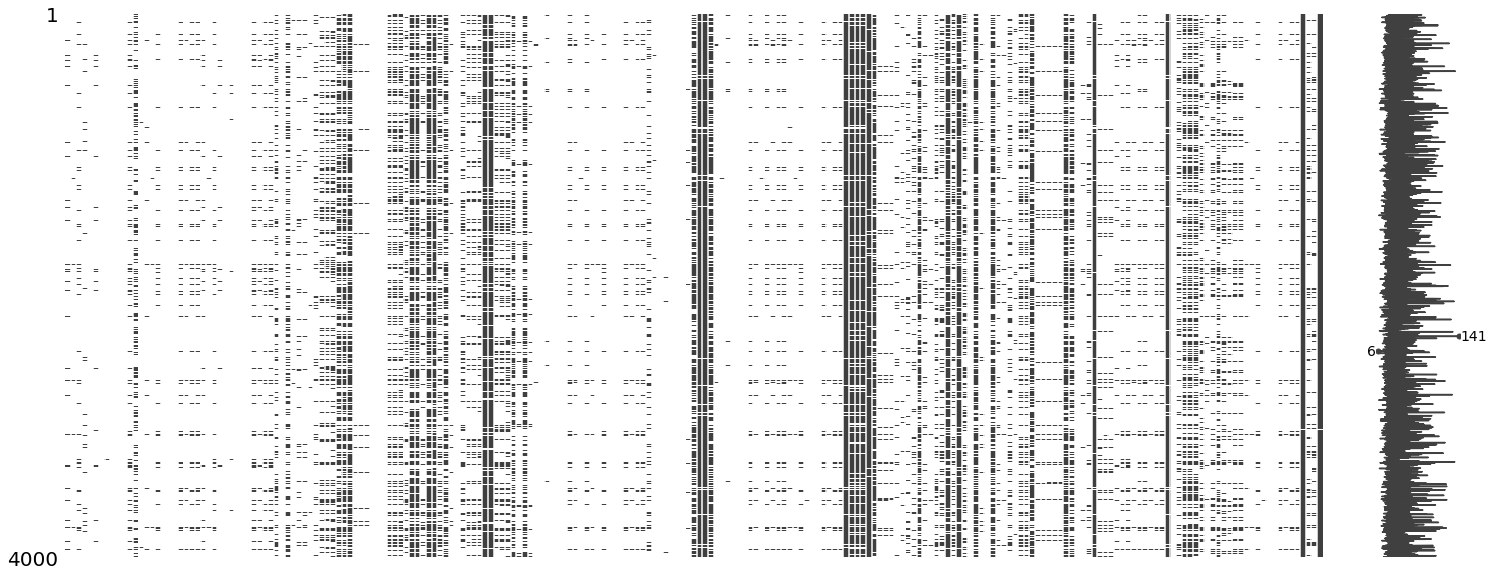

In [13]:
fig=msno.matrix(df[nullable_columns].sample(4000))

In [14]:
fig_copy = fig.get_figure() 

fig_copy.savefig('./Plots and Figures/nullity_matrix.png')

In [15]:
plt.show()

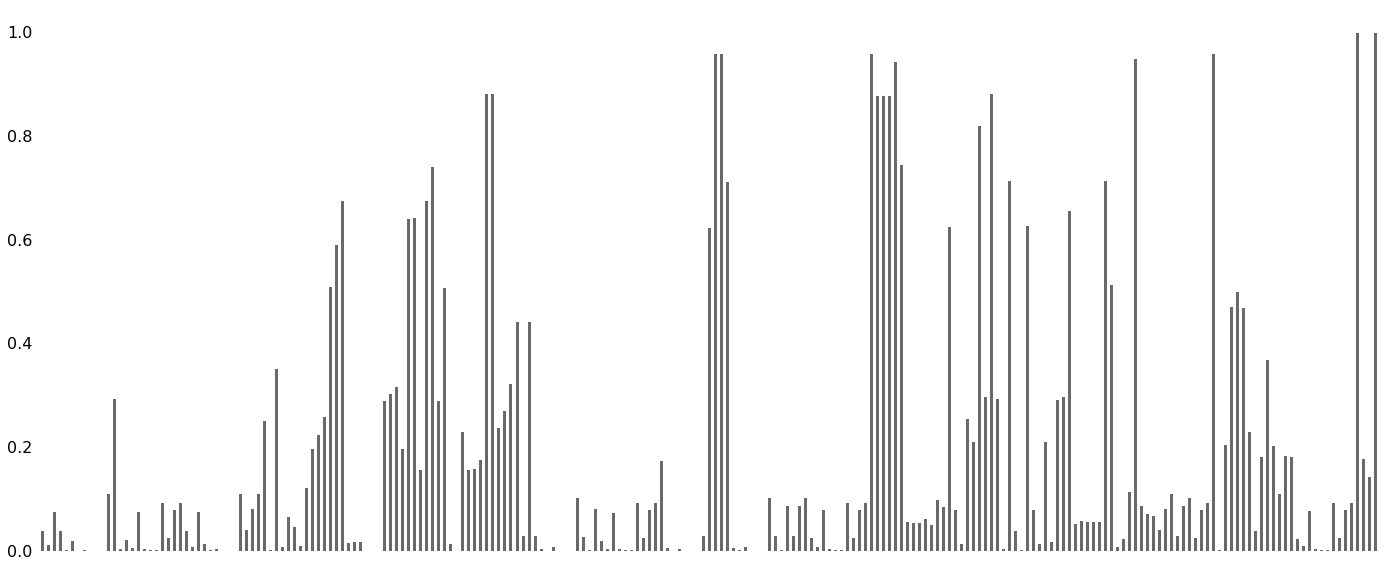

In [16]:
fig = msno.bar(df[nullable_columns].sample(4000))

In [17]:
fig_copy = fig.get_figure() 

fig_copy.savefig('./Plots and Figures/nullity_bar.png')

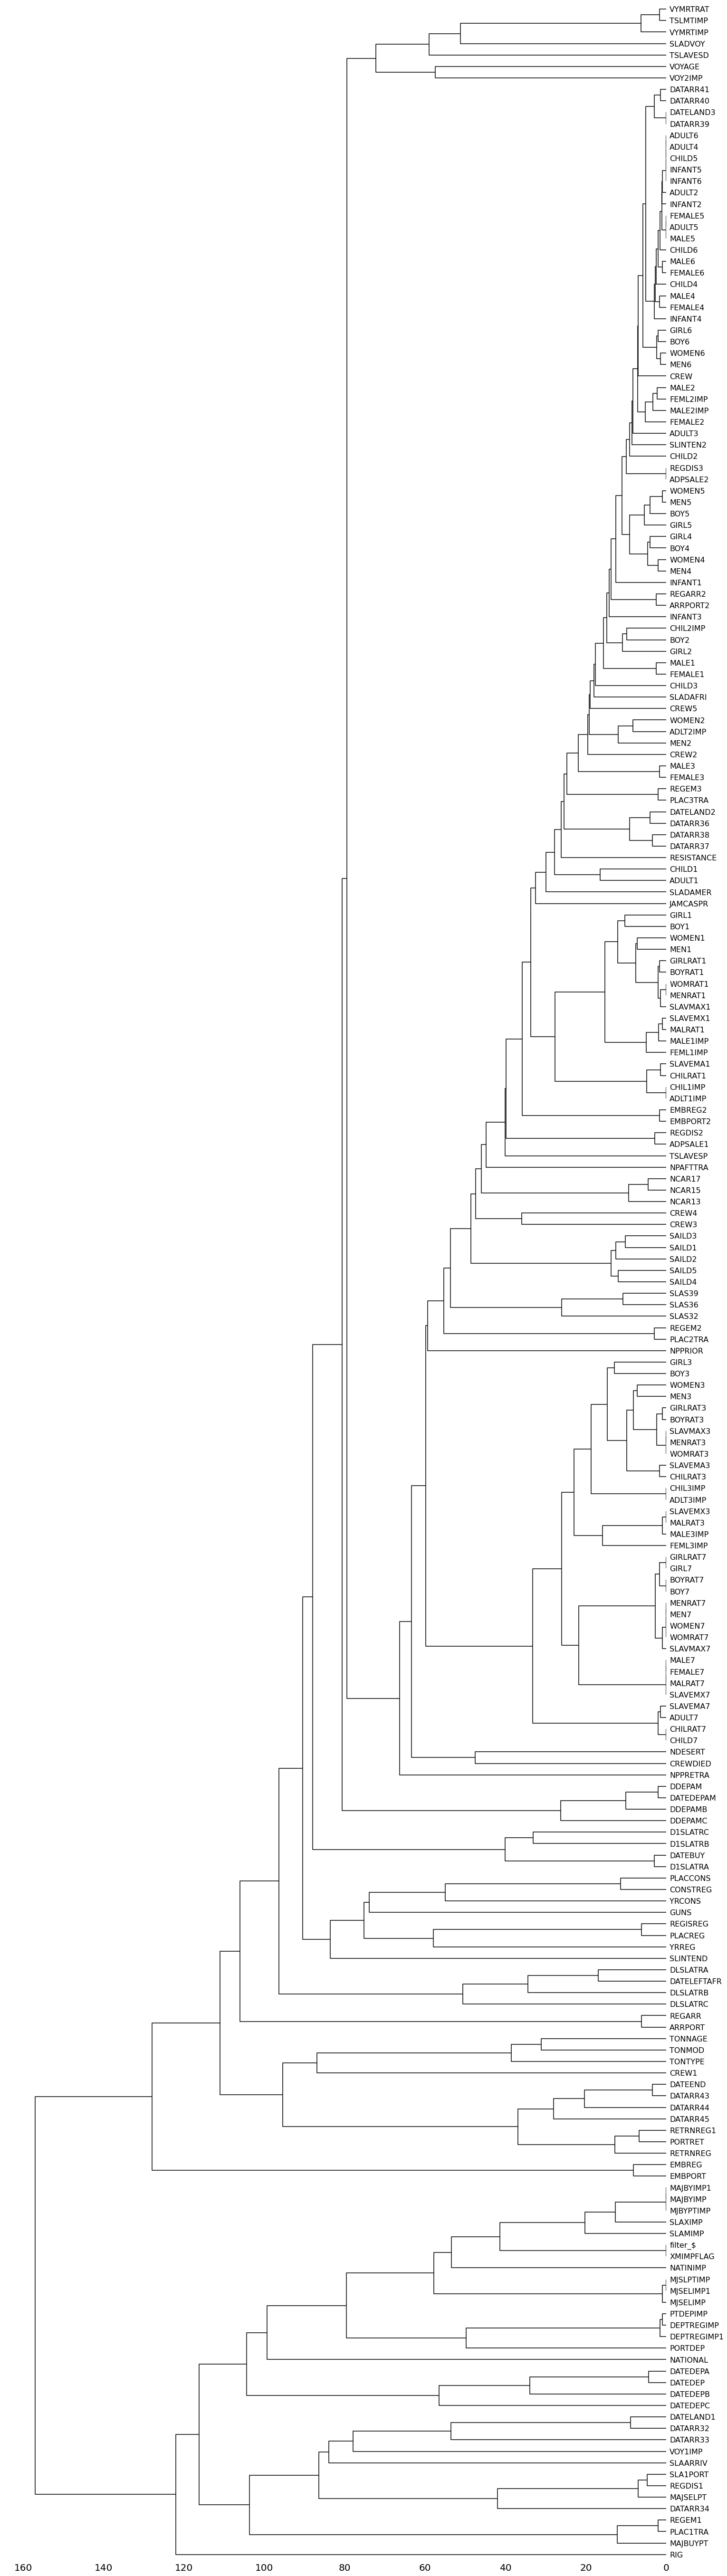

In [18]:
fig = msno.dendrogram(df[nullable_columns])

In [19]:
fig_copy = fig.get_figure() 

fig_copy.savefig('./Plots and Figures/nullity_dendogramm.png')

In [20]:
# Filtering and Keeping Columns where missing values < 80
#df = df[[col for col in df.columns if 100 * df[col].isnull().sum().mean() < 80]]

In [21]:
df = df.drop(columns = ['YRCONS', 'YRREG', 'filter_$', 'WOMEN1', 'WOMEN2', 'WOMEN3', 'WOMEN4', 'WOMEN5',
                        'WOMEN6', 'WOMEN7', 'WOMRAT1', 'WOMRAT3', 'WOMRAT7', 'TSLAVESP', 'TSLMTIMP', 'VOY1IMP','VOY2IMP',
                        'VOYAGE', 'VYMRTIMP','SOURCEH', 'SOURCEI', 'SOURCEJ', 'SOURCEK', 'SOURCEL', 'SOURCEM', 'SOURCEN',
                        'SOURCEO', 'SOURCEP', 'SOURCEQ', 'SOURCER', 'SOURCEB', 'SOURCEC', 'SOURCED', 'SOURCEE', 'SOURCEF', 'SOURCEG',
                       'SLAS32', 'SLAS36', 'SLAS39', 'SLAVEMA1', 'SLAVEMA3', 'SLAVEMA7', 'SLAVEMX1', 'SLAVEMX3', 'SLAVEMX7',
                        'SLAVMAX1', 'SLAVMAX3','SLAVMAX7', 'SLINTEN2','SLADAFRI', 'SLADAMER', 'SLADVOY', 'SAILD1', 'SAILD2', 'SAILD3', 
                        'SAILD4', 'SAILD5','REGDIS3', 'REGARR2', 'PLAC2TRA', 'PLAC3TRA', 'OWNERB', 'OWNERC', 'OWNERD', 'OWNERE',
                        'OWNERF', 'OWNERG', 'OWNERH', 'OWNERI', 'OWNERJ', 'OWNERK', 'OWNERL', 'OWNERM', 'OWNERN',
                        'OWNERO', 'OWNERP', 'NCAR13', 'NCAR15', 'NCAR17', 'NDESERT', 'NPAFTTRA', 'NPPRETRA','NPPRIOR',
                         'MALE1', 'MALE2', 'MALE3', 'MALE4', 'MALE5', 'MALE6', 'MALE7','MALE1IMP','MALE2IMP','MALE3IMP','MALRAT1',
                        'MALRAT3', 'MALRAT7', 'MEN1', 'MEN2','MEN3', 'MEN4','MEN5', 'MEN6', 'MEN7','MENRAT1','MENRAT3','MENRAT7', 
                       'INFANT1', 'INFANT2', 'INFANT3', 'INFANT4','INFANT5', 'INFANT6', 'JAMCASPR', 'FEMALE1','FEMALE2', 'FEMALE3',
                        'FEMALE4', 'FEMALE5', 'FEMALE6', 'FEMALE7', 'FEML1IMP','FEML2IMP','FEML3IMP', 'GIRL2','GIRL3', 'GIRL4', 'GIRL5',
                        'GIRL6', 'GIRL7','GIRLRAT1', 'GIRLRAT3','GIRLRAT7', 'EMBPORT2', 'DATARR38', 'DATARR39', 'DATARR40',
                        'DATARR41', 'DATARR36', 'DATARR37', 'DATARR38', 'DATARR39', 'DATARR40', 'DATARR41', 'DATARR43', 'DATARR44',
                       'CREW', 'CREW1', 'CREW2','CREW3','CREW4','CREW5','CREWDIED','CHILRAT3', 'CHILD1', 'CHILD2','CHILD3', 'CHILD4',
                        'CHILD5', 'CHILD6', 'CHILD7', 'CAPTAINB', 'CAPTAINC', 'ARRPORT2', 'BOY1', 'BOY2', 'BOY3', 'BOY4', 'BOY5', 'BOY6', 'BOY7',
                        'BOYRAT1', 'BOYRAT3', 'BOYRAT7','ADPSALE2', 'ADULT1', 'ADULT2','ADULT3','ADULT4','ADULT5','ADULT6','ADULT7',
                        'ADLT2IMP', 'ADLT3IMP'])

In [22]:
df.sample(2)

,VOYAGEID,ADLT1IMP,ADPSALE1,ARRPORT,CAPTAINA,CHIL1IMP,CHIL2IMP,CHIL3IMP,CHILRAT1,CHILRAT7,CONSTREG,D1SLATRA,D1SLATRB,D1SLATRC,DATARR32,DATARR33,DATARR34,DATARR45,DATEBUY,DATEDEP,DATEDEPA,DATEDEPAM,DATEDEPB,DATEDEPC,DATEEND,DATELAND1,DATELAND2,DATELAND3,DATELEFTAFR,DDEPAM,DDEPAMB,DDEPAMC,DEPTREGIMP,DEPTREGIMP1,DLSLATRA,DLSLATRB,DLSLATRC,EMBPORT,EMBREG,EMBREG2,EVGREEN,FATE,FATE2,FATE3,FATE4,GIRL1,GUNS,MAJBUYPT,MAJBYIMP,MAJBYIMP1,MAJSELPT,MJBYPTIMP,MJSELIMP,MJSELIMP1,MJSLPTIMP,NATINIMP,NATIONAL,OWNERA,PLAC1TRA,PLACCONS,PLACREG,PORTDEP,PORTRET,PTDEPIMP,REGARR,REGDIS1,REGDIS2,REGEM1,REGEM2,REGEM3,REGISREG,RESISTANCE,RETRNREG,RETRNREG1,RIG,SHIPNAME,SLA1PORT,SLAARRIV,SLAMIMP,SLAXIMP,SLINTEND,SOURCEA,TONMOD,TONNAGE,TONTYPE,TSLAVESD,VYMRTRAT,XMIMPFLAG,YEAR5,YEAR10,YEAR25,YEAR100,YEARAF,YEARAM,YEARDEP
31135,81219.0,NaN,NaN,NaN,"Brew, Christopher",NaN,NaN,NaN,NaN,NaN,Other British Caribbean,NaN,NaN,NaN,28.0,2.0,1803.0,1803.0,NaN,6.931613e+09,10.0,6.957446e+09,6.0,1802.0,6.962198e+09,6.954336e+09,NaN,NaN,NaN,5.0,4.0,1803.0,England,Europe,NaN,NaN,NaN,NaN,NaN,NaN,True,Voyage completed as intended,Slaves disembarked Americas,Not captured,Delivered slaves for original owners,NaN,NaN,NaN,Other Africa,Africa,"Trinidad, port unspecified","Africa., port unspecified",Trinidad,Caribbean,"Trinidad, port unspecified",Great Britain,Great Britain,"Buller, Richard",NaN,Bermuda,NaN,Liverpool,Liverpool,Liverpool,NaN,Trinidad,NaN,NaN,NaN,NaN,NaN,NaN,England,Europe,Ship,Elizabeth,"Trinidad, port unspecified",225.0,225.0,250.0,241.0,LR1803,207.0,207.0,English 1,NaN,NaN,"Ship, 1801-25",years 1801-05,years 1801-10,years 1801-25,1800.0,1803.0,1803.0,1802.0
35294,92382.0,NaN,NaN,NaN,"Robinson, William",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,9.0,1725.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.510080e+09,NaN,NaN,NaN,NaN,NaN,NaN,England,Europe,NaN,NaN,NaN,NaN,NaN,NaN,True,Voyage completed as intended,Slaves disembarked Americas,Not captured,Delivered slaves for original owners,NaN,NaN,NaN,Other Africa,Africa,"Barbados, port unspecified","Africa., port unspecified",Barbados,Caribbean,"Barbados, port unspecified",Great Britain,Great Britain,,NaN,NaN,NaN,Liverpool,NaN,Liverpool,NaN,Barbados,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ship,Tarleton,"Barbados, port unspecified",178.0,178.0,208.0,NaN,"CO33/15,13",NaN,NaN,NaN,NaN,NaN,"Ship, pre-1726",years 1721-25,years 1721-30,years 1701-25,1700.0,1725.0,1725.0,1725.0


In [23]:
df = df.drop(columns = ['CHIL1IMP','CHIL2IMP','CHIL3IMP','CHIL1IMP','CHIL2IMP', 'CHIL3IMP','CHILRAT7', 'CONSTREG','D1SLATRA','D1SLATRB','D1SLATRC',
                        'DATARR32','DATARR33', 'DATARR45','DATEBUY', 'DATELAND1','DATELAND2','DATELAND3','DATELEFTAFR','DDEPAM','DDEPAMB','DDEPAMC',
                       'DLSLATRA', 'DLSLATRB', 'DLSLATRC','EMBPORT','EMBREG','EMBREG2'])

In [24]:
df.sample(50)

,VOYAGEID,ADLT1IMP,ADPSALE1,ARRPORT,CAPTAINA,CHILRAT1,DATARR34,DATEDEP,DATEDEPA,DATEDEPAM,DATEDEPB,DATEDEPC,DATEEND,DEPTREGIMP,DEPTREGIMP1,EVGREEN,FATE,FATE2,FATE3,FATE4,GIRL1,GUNS,MAJBUYPT,MAJBYIMP,MAJBYIMP1,MAJSELPT,MJBYPTIMP,MJSELIMP,MJSELIMP1,MJSLPTIMP,NATINIMP,NATIONAL,OWNERA,PLAC1TRA,PLACCONS,PLACREG,PORTDEP,PORTRET,PTDEPIMP,REGARR,REGDIS1,REGDIS2,REGEM1,REGEM2,REGEM3,REGISREG,RESISTANCE,RETRNREG,RETRNREG1,RIG,SHIPNAME,SLA1PORT,SLAARRIV,SLAMIMP,SLAXIMP,SLINTEND,SOURCEA,TONMOD,TONNAGE,TONTYPE,TSLAVESD,VYMRTRAT,XMIMPFLAG,YEAR5,YEAR10,YEAR25,YEAR100,YEARAF,YEARAM,YEARDEP
10982,18275.0,NaN,Montevideo,Buenos Aires,"Sloper, Charles",NaN,1788.0,6.462461e+09,28.0,NaN,7.0,1787.0,6.507907e+09,England,Europe,True,Voyage completed as intended,Slaves disembarked Americas,Not captured,Delivered slaves for original owners,NaN,4.0,Bonny,Bight of Biafra and Gulf of Guinea islands,Africa,Buenos Aires,Bonny,Rio de la Plata,Spanish Mainland America,Buenos Aires,Great Britain,Great Britain,"McTaggart, James*",Bonny,Bristol,Bristol,Bristol,Bristol,Bristol,Rio de la Plata,Rio de la Plata,Rio de la Plata,Bight of Biafra and Gulf of Guinea islands,NaN,NaN,England,NaN,England,Europe,NaN,Pilgrim,Buenos Aires,350.0,350.0,421.0,400.0,"Richardson,IV",259.0,259.0,English 1,421.0,0.17,"B. of Biafra, 1700-1800",years 1786-90,years 1781-91,years 1776-1800,1700.0,1788.0,1788.0,1787.0
15529,29948.0,NaN,NaN,Veracruz,"Prieto, Manuel",NaN,NaN,NaN,NaN,NaN,NaN,1620.0,NaN,Spain,Europe,False,"Left home port, no further record",No information on slaves,Unknown,Unknown outcome,NaN,NaN,NaN,West Central Africa and St. Helena,Africa,NaN,"West Central Africa and St. Helena, port unspe...",Spanish Circum-Caribbean,Spanish Mainland America,Veracruz,NaN,NaN,,NaN,NaN,NaN,San Lucar,NaN,San Lucar,Spanish Circum-Caribbean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Caravela,NS del Monte del Carmen,NaN,NaN,287.0,359.0,80.0,"AGI, Contratacion, Legajo 2882",NaN,NaN,NaN,NaN,NaN,"Spanish, pre-1626",years 1616-20,years 1611-20,years 1601-25,1600.0,1620.0,1620.0,1620.0
30169,80008.0,NaN,NaN,NaN,"Noble, Joseph",NaN,1791.0,6.554477e+09,27.0,NaN,6.0,1790.0,6.586013e+09,England,Europe,True,Voyage completed as intended,Slaves disembarked Americas,Not captured,Delivered slaves for original owners,NaN,NaN,"Gold Coast, port unspecified",Gold Coast,Africa,"St. Vincent, port unspecified","Gold Coast, port unspecified",St. Vincent,Caribbean,"St. Vincent, port unspecified",Great Britain,Great Britain,"Bent, Ellis",Cape Coast Castle,Bermuda,NaN,Liverpool,Liverpool,Liverpool,NaN,St. Vincent,NaN,Gold Coast,Gold Coast,NaN,NaN,NaN,England,Europe,Ship,Abigail,"St. Vincent, port unspecified",106.0,106.0,106.0,225.0,LR1791,135.0,135.0,English 1,106.0,0.00,"Ship, 1776-1800",years 1791-95,years 1791-1800,years 1776-1800,1700.0,1791.0,1791.0,1790.0
28019,51311.0,NaN,NaN,"Bahia, port unspecified",,NaN,NaN,6.816442e+09,15.0,NaN,10.0,1798.0,NaN,Bahia,Brazil,False,"Left home port, no further record",No information on slaves,Unknown,Unknown outcome,NaN,NaN,NaN,Bight of Benin,Africa,NaN,Costa da Mina,Bahia,Brazil,"Bahia, port unspecified",Portugal / Brazil,Portugal,"Moura, Francisco José de",NaN,NaN,NaN,"Bahia, port unspecified",NaN,"Bahia, port unspecified",Bahia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bergantim,NS do Monte do Carmo e Sr dos Aflitos,NaN,NaN,251.0,271.0,NaN,"APEB, cod. 456, p.104",NaN,NaN,NaN,NaN,NaN,"Bergantine, 1776-1800",years 1796-1800,years 1791-1800,years 1776-1800,1700.0,1798.0,1798.0,1798.0
32570,83081.0,NaN,NaN,NaN,"Kelly, Richard",NaN,1790.0,6.523459e+09,3.0,6.551280e+09,7.0,1789.0,6.555082e+09,England,Europe,True,Voyage completed as intended,Slaves disembarked Americas,Not captured,Delivered slaves for original owners,NaN,NaN,Calabar,Bight of Biafra and Gulf of Guinea islands,Africa,"Dominica, port unspecified",Calabar,Dominica,Caribbean,"Dominica, port unspecified",Great Britain,Great Britain,"Fisher, John",Calabar,Liverpool,Liverpool,Liverpool,Liverpool,Liverpool,NaN,Dominica,NaN,Bight of Biaf

In [25]:
df = df.drop(columns = ['ADLT1IMP', 'CHILRAT1', 'GIRL1' , 'REGDIS2', 'REGEM2','REGEM3', 'REGISREG', 'RETRNREG', 'RETRNREG1' ])

In [26]:
df.shape

(36108, 61)

#### Checking the data types 

**Since all numerical data as basically integers in the dataset,
I will go ahead and convert float64 to int32** 

In [27]:
df_int = [ col for col in df if df[col].dtype == 'float64']

In [28]:
df_int 


['VOYAGEID',
 'DATARR34',
 'DATEDEP',
 'DATEDEPA',
 'DATEDEPAM',
 'DATEDEPB',
 'DATEDEPC',
 'DATEEND',
 'GUNS',
 'SLAARRIV',
 'SLAMIMP',
 'SLAXIMP',
 'SLINTEND',
 'TONMOD',
 'TONNAGE',
 'TSLAVESD',
 'VYMRTRAT',
 'YEAR100',
 'YEARAF',
 'YEARAM',
 'YEARDEP']

In [29]:
df['VOYAGEID'] = df['VOYAGEID'].astype('int32')

In [30]:
df_cat = [ col for col in df if df[col].dtype == 'object' and 'category']

In [31]:
df_cat

['CAPTAINA', 'EVGREEN', 'OWNERA', 'SHIPNAME', 'SOURCEA']

In [32]:
df.dtypes

VOYAGEID          int32
ADPSALE1       category
ARRPORT        category
CAPTAINA         object
DATARR34        float64
DATEDEP         float64
DATEDEPA        float64
DATEDEPAM       float64
DATEDEPB        float64
DATEDEPC        float64
DATEEND         float64
DEPTREGIMP     category
DEPTREGIMP1    category
EVGREEN          object
FATE           category
FATE2          category
FATE3          category
FATE4          category
GUNS            float64
MAJBUYPT       category
MAJBYIMP       category
MAJBYIMP1      category
MAJSELPT       category
MJBYPTIMP      category
MJSELIMP       category
MJSELIMP1      category
MJSLPTIMP      category
NATINIMP       category
NATIONAL       category
OWNERA           object
PLAC1TRA       category
PLACCONS       category
PLACREG        category
PORTDEP        category
PORTRET        category
PTDEPIMP       category
REGARR         category
REGDIS1        category
REGEM1         category
RESISTANCE     category
RIG            category
SHIPNAME        

### Analyzing the Content of a Categorical Variable 

In [33]:
## Number of Countries/Territories where Ships were registered

In [34]:
df['NATIONAL'].nunique()

20

In [35]:
df['NATIONAL']

0        Portugal
1             NaN
2             NaN
3             NaN
4             NaN
           ...   
36103    Portugal
36104      France
36105         NaN
36106    Portugal
36107         NaN
Name: NATIONAL, Length: 36108, dtype: category
Categories (20, object): [25, Argentina, Brazil, Denmark, ..., Spain / Uruguay, Sweden, USA, Uruguay]

In [36]:
df['NATIONAL'].unique()

[Portugal, NaN, Sweden, Spain, France, ..., Great Britain, 25, Spain / Uruguay, Portugal / Brazil, Genoa]
Length: 21
Categories (20, object): [Portugal, Sweden, Spain, France, ..., 25, Spain / Uruguay, Portugal / Brazil, Genoa]

In [37]:
obj_df = df.select_dtypes(include = 'object')

In [38]:
# Create a function to describ

In [39]:
import altair as alt

In [40]:
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [41]:
df['NATIONAL'].value_counts(dropna= False, normalize = False)

Great Britain               11239
NaN                          9538
Portugal                     5332
France                       4090
USA                          1799
Spain                        1637
Netherlands                  1249
Brazil                        792
Denmark                       311
Hanse Towns, Brandenburg       61
Sweden                         16
Spain / Uruguay                15
Uruguay                         8
Mexico                          6
Portugal / Brazil               6
Sardinia                        3
Argentina                       2
Norway                          1
Genoa                           1
Russia                          1
25.0                            1
Name: NATIONAL, dtype: int64

In [42]:
source = pd.DataFrame({'Flag': ['Great Britain','Unspecified',                          
'Portugal',                     
'France' ,                      
'USA',                         
'Spain',                      
'Netherlands',                 
'Brazil',                     
'Denmark',                    
'Hanse Towns, Brandenburg',
'Sweden',                      
'Spain / Uruguay',                
'Uruguay',
'Mexico',                          
'Portugal / Brazil',               
'Sardinia',                        
'Argentina',                       
'Norway',                          
'Genoa',                           
'Russia',                          
'Unknown'],
'Values': [11239, 9538, 5332, 4090,
 1799,
 1637,
 1249,
 792,
 311,
 61,
 16,
 15,
 8,
 6,
 6,
 3,
 2,
 1,
 1,
 1,
 1]})

alt.Chart(source).transform_joinaggregate(
    TotalFlags='sum(Values)',
).transform_calculate(
    PercentOfTotal="datum.Values / datum.TotalFlags"
).mark_bar().encode(
    alt.X('PercentOfTotal:Q', axis=alt.Axis(format='.0%')),
    y='Flag:N'
)

alt.Chart(...)

In [43]:
from statistics import mode

In [44]:
df['SHIPNAME'].value_counts(dropna= True)

                                     1636
Mary                                  254
Nancy                                 197
NS do Rosario S Antônio e Almas       182
NS da Conceição S Antônio e Almas     175
                                     ... 
Union Galley                            1
Veracruz                                1
Augustina (a) Francisca                 1
Scaresbrick                             1
Aretéia                                 1
Name: SHIPNAME, Length: 9441, dtype: int64

### Most Common Ship names 

Mary :                                 254

Nancy:                                 197

NS do Rosario S Antônio e Almas:       182

NS da Conceição S Antônio e Almas:     175

In [45]:
df['SHIPNAME'].sample(10)

23830    NS da Vitória e S Antônio
9177                   Nightingale
16043                       Aurore
12405                       Africa
35533                      Success
362                        Nicanor
27110    NS das Brotas e S Gonçalo
7831                  Grote Gerrit
17939               Nouvelle Betsy
28177                NS do Socorro
Name: SHIPNAME, dtype: object

 **SHIPS FLEW THE FLAG OF THE TERRITORY WHERE THEY WERE CONSTRUCTED**

In [46]:
df.groupby(['PLACCONS', 'NATIONAL'])['PLACCONS', 'NATIONAL'].count().dropna().sample(50)

/Users/wilfriedzoungrana/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,,PLACCONS,NATIONAL
PLACCONS,NATIONAL,,
"South Carolina, port unspecified",USA,1.0,1.0
Bideford,Great Britain,3.0,3.0
Hyde County,Great Britain,3.0,3.0
Little Compton,Great Britain,1.0,1.0
Point Askaig,Great Britain,5.0,5.0
80200.0,Portugal,5.0,5.0
Prize (unknown place),Great Britain,86.0,86.0
Bilbao,Spain,1.0,1.0
Gainsborough,Great Britain,1.0,1.0


In [47]:
# Which rig type was the most common?

In [48]:
df['RIG'].value_counts(dropna = False).head(20)

NaN               12414
Ship               4854
Brig               2893
Schooner           2374
Bergantim          1945
Curveta            1882
Snauw              1444
Galera             1231
Brigantine         1177
Sumaca             1142
Sloop               738
Patacho             607
Navio mercante      553
Fregat              429
Galeta              317
Não                 290
Barque              252
Fregata             226
Schooner-brig       141
Yaght                85
Name: RIG, dtype: int64

In [49]:
source1 = df[['RIG', 'NATIONAL']]

In [50]:
source1 = pd.DataFrame({'Rig': ['Unknown','Ship',                          
'Brig',                     
'Schooner' ,                      
'Bergantim',                         
'Curveta',                      
'Snauw',                 
'Galera',                     
'Brigantine',                    
'Sumaca',
'Sloop',                      
'Patacho',                
'Navio mercante',
'Fregat',                          
'Galeta',               
'Não',                        
'Barque',                       
'Fregata',                          
'Schooner-brig',                           
'Yaght'],
'Values': [12414,
 4854,
 2893,
 2374,
 1945,
 1882,
 1444,
 1231,
 1177,
 1142,
 738,
 607,
 553,
 429,
 317,
 290,
 252,
 226,
 141,
 85]})

In [51]:
source1

,Rig,Values
0,Unknown,12414
1,Ship,4854
2,Brig,2893
3,Schooner,2374
4,Bergantim,1945
5,Curveta,1882
6,Snauw,1444
7,Galera,1231
8,Brigantine,1177
9,Sumaca,1142


In [52]:
alt.Chart(source1).mark_bar().encode(
    x= 'Values:Q',
    y= 'Rig:O'
)

alt.Chart(...)

In [53]:
# Who owned the most ventures? Check variable OWNERA--->

In [54]:
m = df['OWNERA'].value_counts(dropna = False,).head(20)

In [55]:
list(m)

[14426,
 647,
 439,
 179,
 157,
 123,
 122,
 115,
 112,
 109,
 104,
 96,
 96,
 90,
 78,
 76,
 72,
 70,
 66,
 65]

In [56]:
m.keys()

Index(['', 'Royal African Company', 'West-Indische Compagnie',
       'Companhia Geral do Grão Pará e Maranhão',
       'Companhia Geral de Pernambuco e Paraíba', 'James, William',
       'Compagnie des Indes', 'South Sea Company',
       'Middelburgsche Commercie Compagnie', 'Boats, William',
       'Company of Royal Adventurers', 'Laroche, James*',
       'Compagnie du Sénégal', 'Case, George', 'Tarleton, John',
       'Ferreira, João Antônio', 'Dawson, John', 'Leyland, Thomas',
       'Harper, William', 'Davenport, William'],
      dtype='object')

In [57]:
source2=  pd.DataFrame({'Vessel Owner': ['Unspecified','Royal African Company', 'West-Indische Compagnie',
       'Companhia Geral do Grão Pará e Maranhão',
       'Companhia Geral de Pernambuco e Paraíba', 'James, William',
       'Compagnie des Indes', 'South Sea Company',
       'Middelburgsche Commercie Compagnie', 'Boats, William',
       'Company of Royal Adventurers', 'Laroche, James*',
       'Compagnie du Sénégal', 'Case, George', 'Tarleton, John',
       'Ferreira, João Antônio', 'Dawson, John', 'Leyland, Thomas',
       'Harper, William', 'Davenport, William'],
      'Values': [12414, 4854, 2893, 2374, 1945, 1882, 1444, 1231, 1177,1142,
 738,
 607,
 553,
 429,
 317,
 290,
 252,
 226,
 141,
 85]})

In [58]:
alt.Chart(source2).mark_bar().encode(
    x= 'Values:Q',
    y= 'Vessel Owner:O'
)

alt.Chart(...)

 #### Percentage of voyages completed as intended(FATE 1 == 1), shipwrecked, captured by pirates, British

In [59]:
s= df['FATE'].value_counts().head(25)

In [60]:
source3 = pd.DataFrame({'Fate': s.keys(),
      'Values': list(s)})

In [61]:
alt.Chart(source3).transform_joinaggregate(
    TotalFate='sum(Values)',
).transform_calculate(
    PercentOfTotal="datum.Values / datum.TotalFate"
).mark_bar().encode(
    alt.X('PercentOfTotal:Q', axis=alt.Axis(format='.0%')),
    y='Fate:N'
)

alt.Chart(...)

9. Outcome for slaves ---> FATE2, most common fate for slaves

Outcome for slaves ---> FATE2, most common fate for slaves

In [62]:
d = df['FATE2'].value_counts().head(25)

In [63]:
d

Slaves disembarked Americas                            26009
Slaves embarked, transhipped or no further record       3780
No information on slaves                                3738
No slaves embarked                                      1589
Slaves disembarked in Africa/Europe                      679
Slaves perished with ship                                269
Slaves embarked but not disemb in Europe or America       44
Name: FATE2, dtype: int64

In [64]:
source4 = pd.DataFrame({'Fate for the Slaves': d.keys(),
      'Values': list(d)})

In [65]:
alt.Chart(source4).transform_joinaggregate(
    TotalFate2='sum(Values)',
).transform_calculate(
    PercentOfTotal="datum.Values / datum.TotalFate2"
).mark_bar().encode(
    alt.X('PercentOfTotal:Q', axis=alt.Axis(format='.0%')),
    y='Fate for the Slaves:N'
)

alt.Chart(...)

. Outcome of voyage if vessel captured? FATE3 --->

11. Outcome of voyage for owners -> FATE 4 --> 'Luckiest owner'?

In [66]:
c = df['FATE3'].value_counts().head(25)

In [67]:
c

Not captured               27443
Unknown                     3722
British                     1847
Natural hazard              1412
French                       727
African                      195
Captor unspecified           178
pirate/privateer action      132
Dutch                        117
Spanish                       99
US                            99
Portuguese                    76
Brazil                        31
Crew action                   23
Venezuela                      3
Haitians                       3
Sweden                         1
Name: FATE3, dtype: int64

In [68]:
source5 = pd.DataFrame({'Fate for the Vessel': c.keys(),
      'Values': list(c)})

In [69]:
alt.Chart(source5).transform_joinaggregate(
    TotalFate3='sum(Values)',
).transform_calculate(
    PercentOfTotal="datum.Values / datum.TotalFate3"
).mark_bar().encode(
    alt.X('PercentOfTotal:Q', axis=alt.Axis(format='.0%')),
    y='Fate for the Vessel:N'
)

alt.Chart(...)

In [70]:
e = df['PORTDEP'].value_counts().head(25)

In [71]:
e

Liverpool                         4968
Bahia, port unspecified           3758
London                            3107
Rio de Janeiro                    2304
Bristol                           2079
Nantes                            1731
Havana                            1137
Lisbon                            1094
Pernambuco, port unspecified      1023
Rhode Island, port unspecified     605
La Rochelle                        481
Vlissingen                         453
Le Havre                           451
Bordeaux                           444
Texel                              392
Barbados, port unspecified         336
Zeeland                            313
San Lucar                          292
Newport                            228
Charleston                         227
Saint-Malo                         218
Cadiz                              191
New York, port unspecified         184
Boston                             170
Seville                            154
Name: PORTDEP, dtype: int